# Import libraries for the Tokyo Olympics Data Analysis

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the Dataset

In [548]:
tokyo_olympics = pd.read_csv('Tokyo Medals 2021.csv')

# View the Dataset

In [550]:
tokyo_olympics.head(5)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3


In [551]:
tokyo_olympics['Country']

0       United States of America
1     People's Republic of China
2                          Japan
3                  Great Britain
4                            ROC
                 ...            
88                         Ghana
89                       Grenada
90                        Kuwait
91           Republic of Moldova
92          Syrian Arab Republic
Name: Country, Length: 93, dtype: object

# View the variables

In [553]:
# we are showing a view of our dependent and independent variable
# our dependent variable would be 'Rank by Total' and the independent variable would be the other variables
tokyo_olympics.columns

Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Rank By Total'],
      dtype='object')

# Data shape

In [555]:
# we have 93 rolls and 6 columns
tokyo_olympics.shape

(93, 6)

# We have no null values in our dataset

In [557]:
tokyo_olympics.isnull().sum()

Country          0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank By Total    0
dtype: int64

# The data type is normalized

In [559]:
tokyo_olympics.dtypes

Country          object
Gold Medal        int64
Silver Medal      int64
Bronze Medal      int64
Total             int64
Rank By Total     int64
dtype: object

# DataFrame information

In [561]:
# Checking & Reviewing DataFrame information
tokyo_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


# Descriptive statistic for the Data

In [563]:
# Overview descriptive statistic for the Data
tokyo_olympics.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


# Checking for Outliers

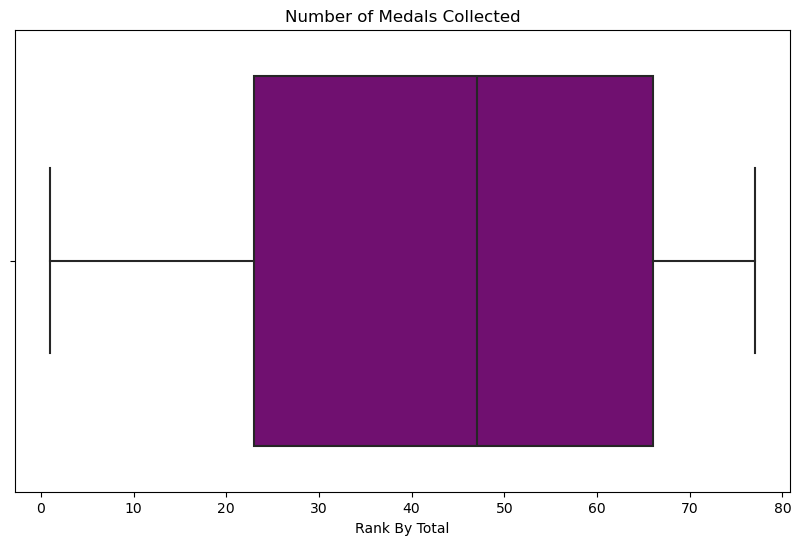

In [565]:
# Use Box plot to check if their are any outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=tokyo_olympics['Rank By Total'], color='purple')
plt.title('Number of Medals Collected')
plt.xlabel('Rank By Total')
plt.show()

In [566]:
# we used the following code only for selecting only the numeric columns from the DataFrame 
numeric_data = tokyo_olympics.select_dtypes(include=[np.number])

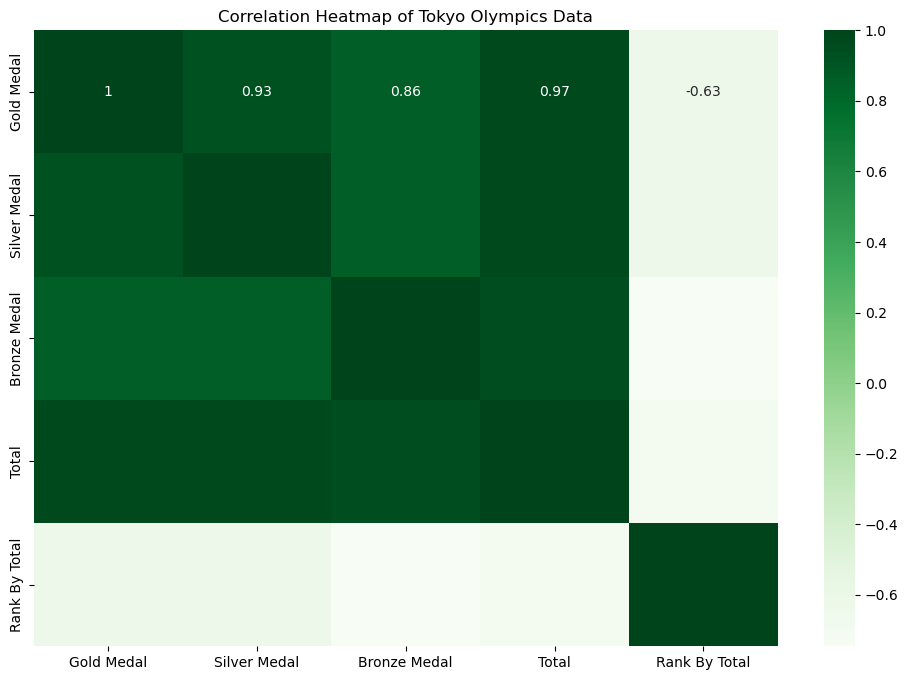

In [567]:
# Plot heat map to check the correlation of the variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Tokyo Olympics Data')
plt.show()


# Drop non numeric column

In [569]:
tokyo_olympics = tokyo_olympics.drop(columns = ['Country'], axis = 1)

# Import libraries to train and test the dataset

In [571]:
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# Define the variables

In [573]:
#Define your features(independent variable) and target(dependent variable)
features = ['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Rank By Total']
target = ['Rank By Total']

In [574]:
# Assign the variables to X and Y
X = tokyo_olympics[features]
y = tokyo_olympics[target]

# Split the variables into training and testing

In [576]:
#split the data into a training set and a testing set
#test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [577]:
#Check the size of the splits
print(f'Training set size: {X_train.shape[0]}samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 74samples
Test set size: 19 samples


# Creating a regression model

In [579]:
# creating Regression Model 
regressor = LinearRegression()

In [580]:
# fit linear regression model
model = regressor.fit(X_train, y_train)

In [581]:
# use model to make predictions
y_pred = regressor.predict(X_test)

In [582]:
#PREDICTION
# with the test predictions complete, the next step will better compare them
# with the actual output values for X_test by organizing them in a DataFrameformat:
predicted = regressor.predict(X_test)

In [583]:
# X_test shape
predicted.shape

(19, 1)

In [584]:
#VALIDATING THE FIT
# printout relevant metrics
print("Model Coefficients:", regressor.coef_)
#looking at the intercept
print("Model intercept:", regressor.intercept_)

Model Coefficients: [[ 9.50684095e-16  6.79046031e-16 -1.81416048e-15 -1.52422049e-16
   1.00000000e+00]]
Model intercept: [-7.10542736e-15]


# NORMALLITY OF RESIDUAL

<Axes: ylabel='Density'>

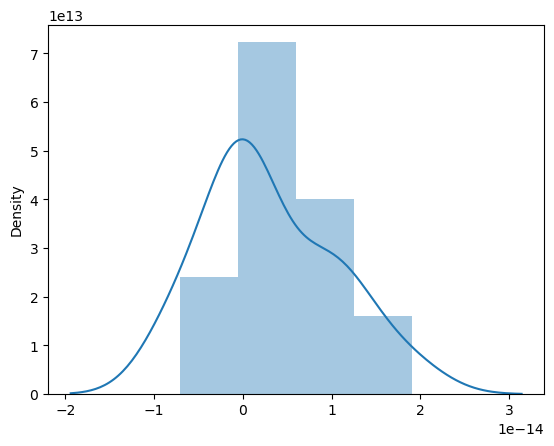

In [586]:
import warnings
warnings.filterwarnings("ignore")
residual = y_test - predicted
sns.distplot(residual)

# Checking for p value

In [588]:
# importing scipy library
import scipy.stats

# finding p-value
p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is:' + str(p_value))

p value is:0.04745968180294733


# OLS Regressing Results model

In [590]:
# printing the OLS Regressin Resluts model
results3 = sm.OLS(y_test, X_test).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Rank By Total   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.658e+31
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                   1.23e-229
Time:                        14:24:58   Log-Likelihood:                          568.14
No. Observations:                  19   AIC:                                     -1128.
Df Residuals:                      15   BIC:                                     -1124.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Gold Medal     8.993e-15   2.37e-15      3.796      0.002    3.94e-15     1.4e-14
Silver Medal  -2.887e-15   2.64e-15     -1.093      0.292   -8.51e-15    2.74e-15
Bronze Medal  -6.162e-15   2.89e-15     -2.133      0.050   -1.23e-14   -5.03e-18
Total         -3.834e-16   2.03e-16     -1.887      0.079   -8.16e-16    4.96e-17
Rank By Total     1.0000   1.28e-16   7.83e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       11.039   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.496
Skew:                          -0.981   Prob(JB):                      0.00526
Kurtosis:                       6.068   Cond. No.                     1.65e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Regression score

In [592]:
# checking the regression score
from sklearn.metrics import confusion_matrix, accuracy_score

regression_confidence = regressor.score(X_test, y_test)
print("Linear regression confidence:", regression_confidence)

Linear regression confidence: 1.0


# Evaluate the model

In [601]:
# Evaluate the model using sklearn.metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [603]:
print(mse)
print(r2)

6.104330241585225e-29
1.0


# Model Accuracy

In [605]:
x2 = abs(predicted - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.


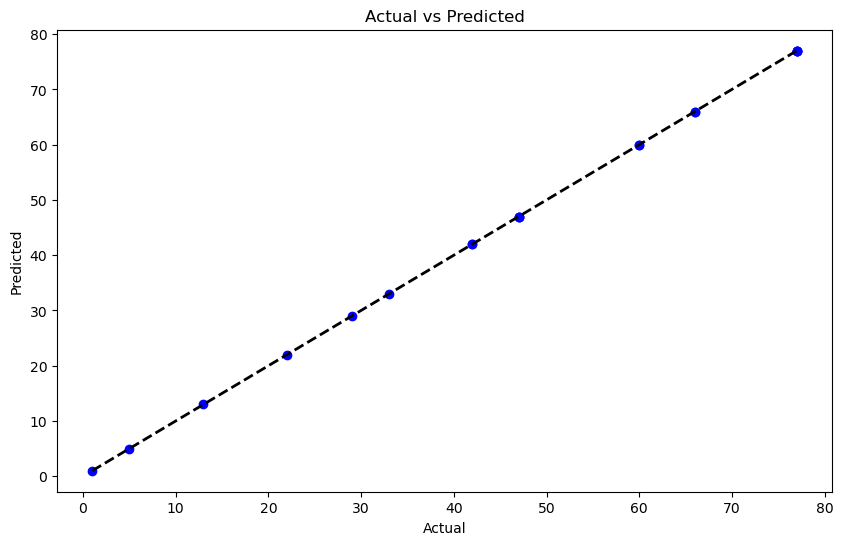

In [629]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='Blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()